## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2022)

Pekka Marttinen, Prayag Tiwari, Vishnu Raj, Tianyu Cui, Yogesh Kumar, Antti Pöllänen, Louis Filstroff, Alex Aushev, Zheyang Shen, Nikitin Alexander , Sebastiaan De Peuter.

## Exercise 5, due on Tuesday March 8 at 23:50.

### Contents
1. Problem 1: EM for missing observations
2. Problem 2: Extension of 'simple example' from the lecture
3. Problem 3: PyTorch

# Problem 1: EM for missing observations
Suppose random variables $X_{i}$ follow a bivariate normal distribution $X_{i}\sim \mathcal{N}_{2}(0,\Sigma)$, where
$ \Sigma = \begin{bmatrix} 1 & \rho\\ \rho & 1 \end{bmatrix} $.

Suppose further that we have observations on $X_{1}=(X_{11},X_{12})^{T}$, $X_{2}=(X_{21},X_{22})^{T}$ and $X_{3}=(X_{31},X_{32})^{T}$, such that
$X_{1}$ and $X_{3}$ are fully observed, and from $X_{2}$ we have observed only
the second coordinate. Thus, our data matrix can be written as

$$
\begin{bmatrix}
x_{11} & x_{12}\\
? & x_{22}\\
x_{31} & x_{32}
\end{bmatrix} 
$$


where the rows correspond to the transposed observations $\mathbf{x}_{1}^{T},\mathbf{x}_{2}^{T},\mathbf{x}_{3}^{T}$. Suppose we want to learn the unknown parameter $\rho$ using the EM-algorithm. Denote the missing observation by $Z$ and derive the E-step of the algorithm, i.e., __(a)__ write the complete data log-likelihood $\ell(\rho)$, __(b)__ compute the posterior distribution of the missing observation, given the observed variables and current estimate for $\rho$, and __(c)__ evaluate the expectation of $\ell(\rho)$ with respect to the posterior distribution of the missing observations.

**Hints**:

1. In general, for $X \sim \mathcal{N}_2(\boldsymbol{\mu},\boldsymbol{\Sigma})$, where $X=(X_1, X_2)^{T}$, $\boldsymbol{\mu}=(\mu_1, \mu_2)^{T}$ and $\boldsymbol{\Sigma} = \begin{pmatrix} 
            \sigma_1^{2} & \rho\sigma_{1}\sigma_{2} \\ 
            \rho\sigma_{1}\sigma_{2} & \sigma_2^{2} 
            \end{pmatrix}$, 
we have 
$$ X_1 \mid X_2 = x_2 \sim \mathcal{N}\left(\mu_1 + \frac{\sigma_1}{\sigma_2}\rho(x_2-\mu_2), (1-\rho^2)\sigma_1^{2}\right),$$  with $\rho$ being the correlation coefficient.
2. For evaluating the expectation of $\ell(\rho)$, you can make use of the following two rules: 
    - $\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2} = trace(\boldsymbol{\Sigma}^{-1}\mathbf{x_2x_2^T}).$
    - if $X \sim \mathcal{N}(\mu, \sigma^2)$ then $\langle{X^2}\rangle = \mu^2 + \sigma^2$.




### a)
\begin{align}
	\ell(\rho) &= \sum_{i=1}^{3}\log p( \mathbf{X_i} \mid \mathbf{\rho})\\
	p( \mathbf{X_i} \mid \mathbf{\rho}) &= \sum_{i=1}^{3}\mathcal{N}(\mathbf{X_i} \mid 0, \mathbf{\Sigma(\rho)})\\
	\implies \ell(\rho) &= \sum_{i=1}^{3}\log \left( \mathcal{N}(\mathbf{X_i} \mid 0, \mathbf{\Sigma(\rho)}) \right) \\
	& = \sum_{i=1}^{3}-\frac{1}{2}\log(\det\left( 2\pi \mathbf{\Sigma(\rho)}\right)) + \sum_{i=1}^{3}\frac{1}{2}\mathbf{X_i}^\top \mathbf{\Sigma(\rho)}^{-1}\mathbf{X_i} \\
	& = -\frac{3}{2}\log(\det\left( 2\pi \mathbf{\Sigma(\rho)}\right)) + \sum_{i=1}^{3}\frac{1}{2}\mathbf{X_i}^\top \mathbf{\Sigma(\rho)}^{-1}\mathbf{X_i}, \qquad | \mathbf{X_2} = \begin{bmatrix} Z \\ x_{22}\end{bmatrix}
\end{align}

### b)

From the hint we can extrapolate that the posterior destribution of the missing value given the observed value and current estimate $\rho_0$:

\begin{equation}
    Z \mid X_{22} = x_{22} \sim \mathcal{N} (\rho_0 x_{22}, 1-\rho_0^2)
\end{equation}


### c) 

We want to compute the expectation with respect to the missing values $\mathbf{Z}$. We see that the only term that depends $\mathbf{Z}$ is $\mathbf{X_2}$. We thus only need to count the following expectation:

\begin{align}
	\mathbb{E}\left( \ell(\rho)\right) &= \mathbb{E}\left( -\frac{3}{2}\log(\det\left( 2\pi \mathbf{\Sigma(\rho)}\right)) + \sum_{i=1}^{3}\frac{1}{2}\mathbf{X_i}^\top \mathbf{\Sigma(\rho)}^{-1}\mathbf{X_i}\right) \\ 
	&=  -\frac{3}{2}\log(\det\left( 2\pi \mathbf{\Sigma(\rho)}\right)) + \sum_{i=1\lbrace 1,3 \rbrace}\frac{1}{2}\mathbf{X_i}^\top \mathbf{\Sigma(\rho)}^{-1}\mathbf{X_i} + \frac{1}{2}\mathbb{E}\left(\mathbf{X_2}^\top \mathbf{\Sigma(\rho)}^{-1}\mathbf{X_2} \right) \\
	\mathbb{E}\left(\mathbf{X_2}^\top \mathbf{\Sigma(\rho)}^{-1}\mathbf{X_2} \right) 
	&= \mathbb{E}\left(\text{trace}(\mathbf{\Sigma(\rho)}^{-1}\mathbf{x_2x_2^T})\right) \\
	&= \text{trace}(\mathbf{\Sigma(\rho)}^{-1}\mathbb{E}(\mathbf{x_2x_2^T})) \\
	&= \text{trace}(\mathbf{\Sigma(\rho)}^{-1}\mathbb{E}\left( 
	\begin{bmatrix}
		\mathbf{Z}^2 & \mathbf{Z} \mathbf{x}_{22} \\
		\mathbf{Z}x_{22} & \mathbf{x}_{22}^2 
	\end{bmatrix})\right)  \\
	\mathbb{E}\left( 
	\begin{bmatrix}
		\mathbf{Z}^2 & \mathbf{Z} \mathbf{x}_{22} \\
		\mathbf{Z}x_{22} & \mathbf{x}_{22}^2 
	\end{bmatrix})\right) 
 &=
  \begin{bmatrix}
 	(\rho_0\mathbf{x}_{22})^2 + 1-\rho_0^2 & \rho_0\mathbf{x}_{22} \mathbf{x}_{22} \\
 	\rho_0\mathbf{x}_{22} \mathbf{x}_{22} & \mathbf{x}_{22}^2 
 \end{bmatrix}
 =
 \begin{bmatrix}
 	(\rho_0\mathbf{x}_{22})^2 + 1-\rho_0^2 & \rho_0\mathbf{x}_{22}^2 \\
 	\rho_0\mathbf{x}_{22}^2 & \mathbf{x}_{22}^2 
 \end{bmatrix} \\
 \mathbf{\Sigma(\rho)}^{-1} &= \frac{1}{\det(\mathbf{\Sigma(\rho)})}
 \begin{bmatrix}
 	1 & -\rho \\
 	-\rho & 1
 \end{bmatrix} = 
\frac{1}{1-\rho^2}
\begin{bmatrix}
	1 & -\rho \\
	-\rho & 1
\end{bmatrix}\\
 \text{trace}(\mathbf{\Sigma(\rho)}^{-1} 
 \left( 
 \begin{bmatrix}
 	(\rho_0\mathbf{x}_{22})^2 + 1-\rho_0^2 & \rho_0\mathbf{x}_{22}^2 \\
 	\rho_0\mathbf{x}_{22}^2 & \mathbf{x}_{22}^2 
 	\end{bmatrix}
 \right) 
 &= 
 \text{trace}\left( 
 \frac{1}{1-\rho^2}
 \begin{bmatrix}
 	1 & -\rho \\
 	-\rho & 1
 \end{bmatrix}
 \begin{bmatrix}
 	(\rho_0\mathbf{x}_{22})^2 + 1-\rho_0^2 & \rho_0\mathbf{x}_{22}^2 \\
 	\rho_0\mathbf{x}_{22}^2 & \mathbf{x}_{22}^2 
 \end{bmatrix}
 \right) \\
 &= 
 \frac{1}{1-\rho^2}
 \text{trace}\left( 
 \begin{bmatrix}
 	(\rho_0\mathbf{x}_{22})^2 + 1-\rho_0^2 + \rho \rho_0 \mathbf{x_{22}}^2 & \rho_0\mathbf{x}_{22}^2 - \rho \mathbf{x_{22}}^2 \\
 	\rho(\rho_0\mathbf{x}_{22}^2 +1 - \rho_0)+\rho_0\mathbf{x_{22}}^2 & \mathbf{x}_{22}^2 -\rho \rho_0\mathbf{x_{22}}^2
 \end{bmatrix}
 \right) \\
 \mathbb{E}\left(\mathbf{X_2}^\top \mathbf{\Sigma(\rho)}^{-1}\mathbf{X_2} \right)  &= \frac{1}{1-\rho^2} \left( \rho_0^2\mathbf{x_{22}}^2+1- \rho^2-2\rho\rho_0\mathbf{x_{22}}^2+\mathbf{x_{22}}^2\right) \\
 \implies 
 \mathbb{E}\left( \ell(\rho)\right)= 
 -\frac{3}{2}\log(\det\left( 2\pi \mathbf{\Sigma(\rho)}\right)) + \sum_{i=\lbrace 1,3 \rbrace}\frac{1}{2}\mathbf{X_i}^\top \mathbf{\Sigma(\rho)}^{-1}\mathbf{X_i}
 &+ \frac{1}{2(1-\rho^2)} \left( \rho_0^2\mathbf{x_{22}}^2+1- \rho^2-2\rho\rho_0\mathbf{x_{22}}^2+\mathbf{x_{22}}^2\right) \\
\end{align}



# Problem 2: Extension of 'simple example' from the lecture
Suppose that we have $N$ independent observations $x = ( x_1, \dots, x_N )$ from a two-component mixture of univariate Gaussian distributions with unknown mixing co-efficients and unknown mean of the second component:
$$ p(x_{n} \mid \theta,\tau)=(1-\tau)\mathcal{N}(x_{n}|0,1)+\tau\mathcal{N}(x_{n} \mid \theta,1).$$

**(a)** Write down the complete data log-likelihood and derive the EM-algorithm for learning the maximum likelihood estimates for $\theta$ and $\tau$. 

**(b)** Simulate some data from the model ($N = 100$ samples) with the true values of parameters $\theta$ = 3 and $\tau = 0.5$. Run your EM algorithm to see whether the learned parameters converge close to the true values (by e.g. just listing the estimates from a few iterations or plotting them). Use the code template below (after the answer cell) as a starting point. 

**HINT**: The E and M steps for simple example.pdf from the lecture material looks as follows
```Python
	# E-step: compute the responsibilities r2 for component 2
	r1_unnorm = scipy.stats.norm.pdf(x, 0, 1)
	r2_unnorm = scipy.stats.norm.pdf(x, theta_0, 1)
	r2 = r2_unnorm / (r1_unnorm + r2_unnorm)
	
	# M-step: compute the parameter value that maximizes
	# the expectation of the complete-data log-likelihood.
	theta[it] = sum(r2 * x) / sum(r2)
```






The complete log-likelihood can be calcualted as

\begin{align}
	\ell(\theta, \tau) 
	&= \sum_{n=1}^{N} \log p(x_n, z_n \mid \theta, \tau) \\
	&= \sum_{n=1}^{N} \log p(x_n \mid z_n, \theta) + \log p(z_n \mid \tau) \\
	&= \sum_{n=1}^{N} \log (1-\tau) \mathcal{N}(x_n \mid 0,1)^{z_{n1}} + \log (\tau) \mathcal{N}(x_n \mid \theta,1)^{z_{n2}} \\
	&= \sum_{n=1}^{N} z_{n1}\log \mathcal{N}(x_n \mid 0,1)  + z_{n2}\log\mathcal{N}(x_n \mid \theta,1) + \log (\tau) +\log (1-\tau)
\end{align}

#### E-step

\begin{align}
	p(z_{n1} = 1 \mid x_n, \theta_0, \tau_0) &\propto p(z_{n1} = 1) p(x_n \mid z_{n1}, \theta_0, \tau_0) \\
	&= (1-\tau_0)\mathcal{N}(x_n \mid 0,1) \\
	p(z_{n1} = 1 \mid x_n, \theta_0, \tau_0) &\propto (\tau_0)\mathcal{N}(x_n \mid \theta_0,1)
\end{align}
We also normalize the probabilities as 
\begin{align}
	\gamma(z_{n1}) = p(z_{n1} = 1 \mid x_n, \theta_0, \tau_0) &= \frac{(1-\tau_0)\mathcal{N}(x_n \mid 0,1)}{(1-\tau_0)\mathcal{N}(x_n \mid 0,1) + (\tau_0)\mathcal{N}(x_n \mid \theta_0,1)} \\
	\gamma(z_{n2}) = p(z_{n2} = 1 \mid x_n, \theta_0, \tau_0) &= \frac{(\tau_0)\mathcal{N}(x_n \mid \theta_0,1)}{(1-\tau_0)\mathcal{N}(x_n \mid 0,1) + (\tau_0)\mathcal{N}(x_n \mid \theta_0,1)}
\end{align}

Since we have a bivariate distribution, we can note the responsibilites $\gamma(z_{n2}) = 1- \gamma(z_{n1})$

\begin{align}
	Q(\theta, \tau \mid \theta_0, \tau_0) =& \mathbb{E}_{z} \left(\sum_{n=1}^{N} z_{n1}\log \mathcal{N}(x_n \mid 0,1)  + z_{n2}\log\mathcal{N}(x_n \mid \theta,1) + z_{n2}\log (\tau) + z_{n1}\log(1-\tau)\right) \\
	=& \sum_{n=1}^{N} \mathbb{E}(z_{n1})\log \mathcal{N}(x_n \mid 0,1)  + \mathbb{E}(z_{n2})\log\mathcal{N}(x_n \mid \theta,1) + \mathbb{E}(z_{n2})\log (\tau) + \mathbb{E}(z_{n1})\log (1-\tau)\\
	=& \sum_{n=1}^{N} \gamma(z_{n1})\log \mathcal{N}(x_n \mid 0,1)  + (1-\gamma(z_{n1}))\log\mathcal{N}(x_n \mid \theta,1) + (1-\gamma(z_{n1}))\log (\tau) + \gamma(z_{n1})\log (1-\tau)
\end{align}

#### M-step

We note that $\frac{d}{d\mu}\mathcal{N}(x_n|\mu,1) = \mathcal{N}(x_n|\mu,1)(x_n - \mu)$

For $\theta$:

\begin{align}
	\frac{d}{d\theta}Q(\theta, \tau \mid \theta_0) =& 
	\sum_{n=1}^{N} \frac{d}{d\theta}(1-\gamma(z_{n1}))\log\mathcal{N}(x_n \mid \theta,1) \\
	=& \sum_{n=1}^{N} (1-\gamma(z_{n1}))(x_n - \theta)\\
	\frac{d}{d\theta}Q(\theta, \tau \mid \theta_0) = 0 \iff 0 =& \sum_{n=1}^{N} (1-\gamma(z_{n1}))(x_n - \theta) \\
	=& \sum_{n=1}^{N}(1-\gamma(z_{n1}))x_n - \sum_{n=1}^{N}(1-\gamma(z_{n1}))\theta\\
	\sum_{n=1}^{N}(1-\gamma(z_{n1}))\theta =& \sum_{n=1}^{N}(1-\gamma(z_{n1}))x_n \\
	\theta =& \frac{1}{N_2}\sum_{n=1}^{N}(1-\gamma(z_{n1}))x_n, \qquad | N_2 = \sum_{n=1}^{N}(1-\gamma(z_{n1}))
\end{align}

For $\tau$:

\begin{align}
	\frac{d}{d\tau}Q(\theta, \tau \mid \theta_0) =& \sum_{n=1}^{N} \frac{d}{d\tau} (1-\gamma(z_{n1}))\log (\tau) + \gamma(z_{n1})\log (1-\tau) \\
	&= \sum_{n=1}^{N} \frac{1-\gamma(z_{n1})}{\tau} +  \frac{\gamma(z_{n1})}{1-\tau} = \frac{N_2}{\tau} + \frac{N_1}{1-\tau}\\
	&\iff \\
	\tau &= \frac{N_2}{N_1+N_2}
\end{align}

theta       tau
1.0000000  0.1000000
3.2393002  38.5929521
3.2223708  61.1837756
3.2303810  60.8841014
3.2245561  61.1086403
3.2287852  60.9453138
3.2257118  61.0638476
3.2279438  60.9776821
3.2263221  61.0402436
3.2274999  60.9947810
3.2266442  61.0277973
3.2272658  61.0038090
3.2268142  61.0212322
3.2271422  61.0085744
3.2269040  61.0177686
3.2270770  61.0110894
3.2269513  61.0159411
3.2270426  61.0124166
3.2269763  61.0149768
3.2270245  61.0131170


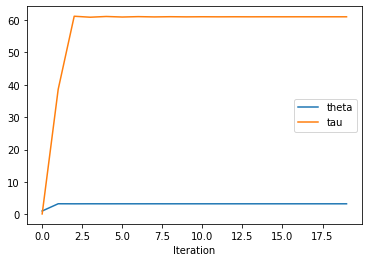

In [9]:
# template for Problem 2(b)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


### Simulate data:

np.random.seed(0)

theta_true = 3
tau_true = 0.5
n_samples = 100

x = np.zeros(n_samples)
for i in range(n_samples):
    # Sample from N(0,1) or N(theta_true,1)
    if np.random.rand() < 1 - tau_true:
        x[i] = np.random.normal(0, 1)
    else:
        x[i] = np.random.normal(theta_true, 1)


### The EM algorithm:

n_iter = 20
theta = np.zeros(n_iter)
tau = np.zeros(n_iter)

# Initial guesses for theta and tau
theta[0] = 1
tau[0] = 0.1

for it in range(1, n_iter):
    # The current estimates for theta and tau,
    # computed in the previous iteration
    theta_0 = theta[it-1]
    tau_0 = tau[it-1]

    # E-step: compute the responsibilities r1 and r2
    r1_unnorm = (1-tau_0)*scipy.stats.norm.pdf(x, 0, 1)
    r2_unnorm = (tau_0)*scipy.stats.norm.pdf(x, theta_0, 1)
    r1 = r1_unnorm / (r1_unnorm + r2_unnorm)
    r2 = r2_unnorm / (r1_unnorm + r2_unnorm)

    # M-step: compute the parameter values that maximize
    # the expectation of the complete-data log-likelihood.
    theta[it] = sum(r2 * x) / sum(r2)
    tau[it] = sum(r2) / sum(r1) + sum(r2)
    

# Print and plot the values of theta and tau in each iteration
print("theta       tau")
for theta_i, tau_i in zip(theta, tau):
    print("{0:.7f}  {1:.7f}".format(theta_i, tau_i))

plt.plot(range(n_iter), theta, label = 'theta')
plt.plot(range(n_iter), tau, label = 'tau')
plt.xlabel('Iteration')
plt.legend()
plt.show()

### Problem 3: PyTorch
Go through the PyTorch tutorials in the three links and answer the questions given below

1) What is PyTorch: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

2) Autograd: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

3) Linear regression with PyTorch: https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py

__(a)__ What are PyTorch Tensors and how do you run a CPU tensor on GPU? 


__(b)__ What is Automatic differentiation and autograd? 


__(c)__ PyTorch constructs the computation graph dynamically as the operations are defined. In the 'linear regression with PyTorch' tutorial which line numbers indicates the completion of the computation graph, computation of the gradients and update of the weights, respectively? 



Write your answer to Problem 3 here.

__(a)__: PyTorch tensors are a special data struct that can be run on GPUs or specialized hardware. In order to run Tensors on the GPU you use the command tensor.to("cuda")

__(b)__: Autograd is a automatic differentiation engine for computing vector jacobian products. Automatic differentiation uses the DAG of the model to compute the gradient of the model using the chain rule. The result is then saved in a DAG for later use. 

__(c)__: 
* "the completion of the computation graph": 37
* "computation of the gradients": 41
* "update of the weights": 42